# Rekomendasi Spotify

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [3]:
df = pd.read_csv('/content/drive/MyDrive/spotify_dataset/dataset.csv')
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Data Understanding

### Informasi Statistik Dataset


In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
df = df.drop(df.columns[0], axis =1)

### Menangani Nilai Duplikat

In [7]:
print(f"jumlah nilai duplikat dalam data  : {df.duplicated().sum()}")

jumlah nilai duplikat dalam data  : 450


In [8]:
df = df.drop_duplicates()

In [9]:
print(f"jumlah nilai duplikat dalam data  : {df.duplicated().sum()}")

jumlah nilai duplikat dalam data  : 0


In [10]:
df.loc[df.track_id.duplicated()].sort_values(by= 'track_id')

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,rock
3257,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,alternative
94239,004h8smbIoAkUNDJvVKwkG,Ouse;Powfu,Loners Diary,Lovemark,58,219482,True,0.808,0.331,5,-13.457,1,0.0557,0.131000,0.000000,0.2250,0.337,140.035,4,sad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89274,7zubR9uYAWjb5KPZTMm85e,Jhayco;Anuel AA,El perreo es el futuro,Ley Seca,0,263666,False,0.759,0.843,8,-3.718,1,0.0913,0.127000,0.000000,0.1140,0.560,105.016,4,reggaeton
107898,7zumacGldlmxpoP8bpaeLe,Squeeze,Greatest Hits,Slap & Tickle,24,256839,False,0.585,0.805,11,-14.211,0,0.0344,0.007390,0.000828,0.0699,0.919,131.820,4,synth-pop
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative


In [11]:
df.loc[df['track_id'] == '1R0hxCA5R7z5TiaXBZR7Mf', ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']]

,track_id,artists,album_name,track_name,track_genre
65003,1R0hxCA5R7z5TiaXBZR7Mf,JENNIE,SOLO,SOLO,k-pop
81916,1R0hxCA5R7z5TiaXBZR7Mf,JENNIE,SOLO,SOLO,pop


In [12]:
combined_genres = {}

for _, row in df.iterrows():
    track_id = row['track_id']
    genre = row['track_genre']

    if track_id in combined_genres:
        combined_genres[track_id].append(genre)
    else:
        combined_genres[track_id] = [genre]

def get_combined_genres(row):
    track_id = row['track_id']
    if track_id in combined_genres:
        return combined_genres[track_id]
    else:
        return [row['track_genre']]

df['track_genre'] = df.apply(get_combined_genres, axis=1)

In [13]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,"[acoustic, j-pop, singer-songwriter, songwriter]"
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,"[acoustic, chill]"
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,[acoustic]
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,[acoustic]
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,[acoustic]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,[world-music]
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,[world-music]
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,[world-music]
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,[world-music]


In [14]:
df['track_genre'] = df['track_genre'].apply(lambda x: ",".join(x))

In [15]:
print(f"jumlah nilai duplikat dalam data  : {df.duplicated().sum()}")

jumlah nilai duplikat dalam data  : 23089


In [16]:
df = df.drop_duplicates()

In [17]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,"acoustic,j-pop,singer-songwriter,songwriter"
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,"acoustic,chill"
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [18]:
df.loc[df['track_id'] == '1R0hxCA5R7z5TiaXBZR7Mf', ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']]

,track_id,artists,album_name,track_name,track_genre
65003,1R0hxCA5R7z5TiaXBZR7Mf,JENNIE,SOLO,SOLO,"k-pop,pop"


In [19]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [20]:
df = df.dropna(axis = 0)

In [21]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

### Sampling

In [22]:
df = df.sample(35000)

### Univariate Analysis

#### Fitur Kategorikal

In [23]:
df_categorical = df.select_dtypes(include= 'object')

In [24]:
df_categorical

,track_id,artists,album_name,track_name,track_genre
68827,3mDu5G1XUi60qhoA2p2jlP,Tali Goya,El Juego,El Juego,latino
113008,4ElNxglBjcrASiGn58t9Jm,for KING & COUNTRY,Burn The Ships,God Only Knows,"alt-rock,world-music"
8407,5Xsh6OAQNRJrjYWdaWUuEN,Zayde Wølf,Modern Alchemy,Rule the World,blues
108756,4sBkID6i6b3SOzHQUzE1hX,Carlos Gardel,Victoria,Muñeca Brava,tango
41100,6YV9Ci9r6Gup1l0Ea469aC,Marti West,Give Me Light,Give Me Light,goth
...,...,...,...,...,...
2023,1bOENKlPYEDXyH9kLFUsnj,Nickelback,Timeless Rock Hits,Animals,"alt-rock,alternative,grunge,metal,rock"
98562,64L9jlYeCVEojwVRpTaxcv,Linda Eder,It's Time,Big Time,show-tunes
58523,0Lju0ckryBvpk0uTt0hhXK,KMFDM,XTORT,Wrath,industrial
8039,2nuV7cBiwVt2tU4sDkwj4I,Otis Redding,pov: you saw mommy kissing santa claus,"Merry Christmas, Baby [take 1] - Take 1","blues,soul"


In [25]:
genre = df_categorical['track_genre'].value_counts()
genre

study                                         408
children                                      408
malay                                         400
tango                                         398
sleep                                         391
                                             ... 
chill,pop                                       1
alternative,emo,metal,punk,ska                  1
garage,rock-n-roll                              1
black-metal,british,death-metal,goth,metal      1
death-metal,french,groove,metal                 1
Name: track_genre, Length: 1044, dtype: int64

<Axes: >

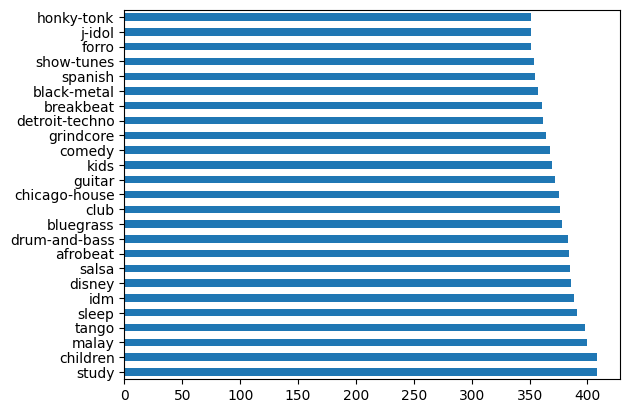

In [26]:
genre = df_categorical['track_genre'].value_counts().head(25)
genre.plot(kind= 'barh')

<Axes: >

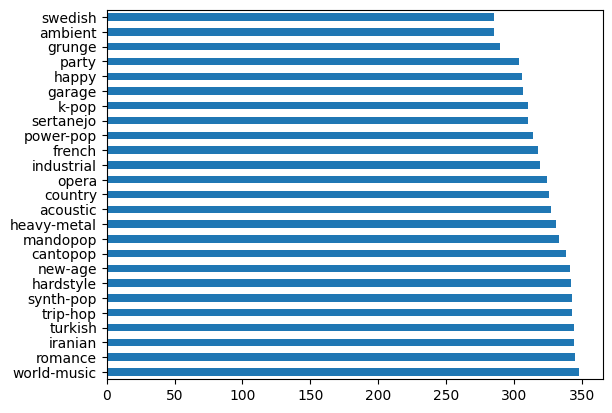

In [27]:
genre = df_categorical['track_genre'].value_counts()[25:50]
# genre berjumlah 114
genre.plot(kind= 'barh')

<Axes: >

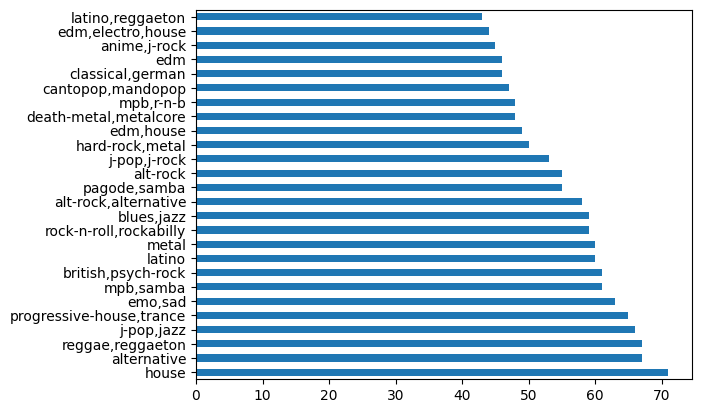

In [28]:
genre = df_categorical['track_genre'].value_counts()[114:140]
# genre berjumlah 114
genre.plot(kind= 'barh')

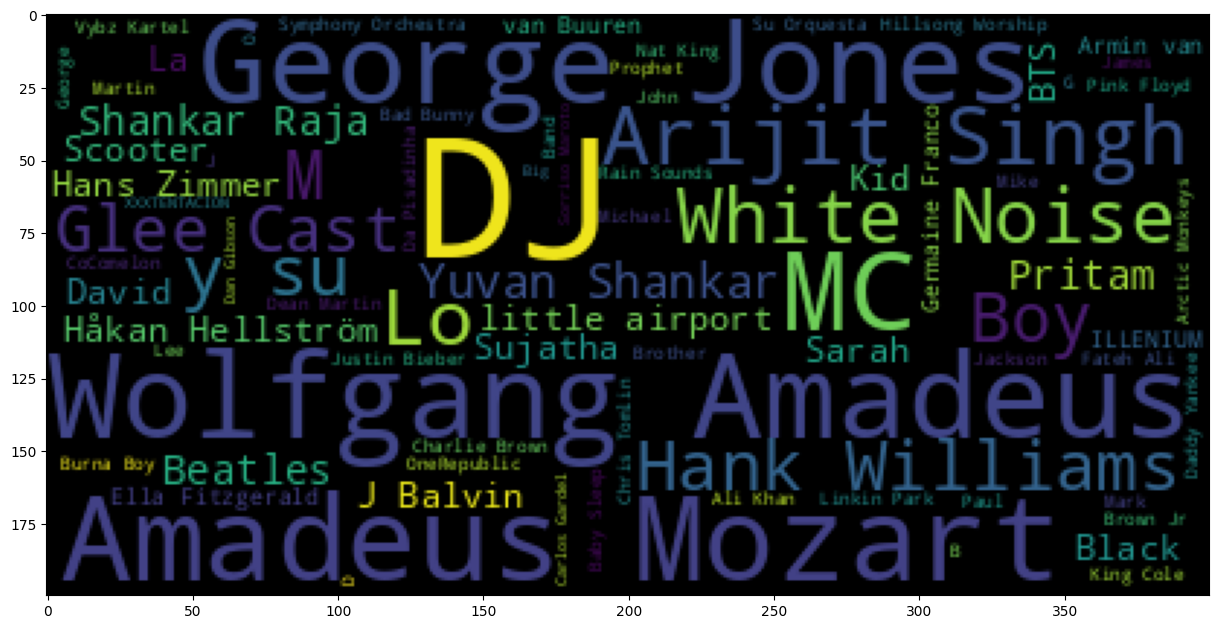

In [29]:
text = ' '.join(df['artists'])
plt.figure(figsize=(15, 12))
wordcloud = WordCloud(background_color = 'black').generate(text)
plt.imshow(wordcloud)

In [30]:
df_categorical.loc[(df_categorical['artists'].str.contains("blackpink", case = False))]

,track_id,artists,album_name,track_name,track_genre
65997,4jUEHIrc443f743JbyLN0y,BLACKPINK,BLACKPINK IN YOUR AREA (Japanese Version),DDU-DU DDU-DU - Japanese Version,k-pop
65678,29fsVDL9T36N0tyD7ByLdI,BLACKPINK,Kill This Love,Hope Not,k-pop
65532,3VN74YiIjtY5ouKahBjmRX,BLACKPINK,Kill This Love,Kick It,k-pop
65028,69BIczdH6QMnFx7dsSssN8,BLACKPINK,SQUARE UP,DDU-DU DDU-DU,k-pop
65846,5nIjOnMbC0QDMrYFLGx0yV,BLACKPINK,BLACKPINK IN YOUR AREA (Japanese Version),BOOMBAYAH - Japanese Version,k-pop
65063,1cdbkpZ3q1KYZDNSrOpdkb,BLACKPINK;Selena Gomez,THE ALBUM,Ice Cream (with Selena Gomez),k-pop
65666,2hPJcTRIOEqCWTMpYQZNnr,BLACKPINK,BORN PINK,Typa Girl,k-pop
65425,3AgMOlgdrG9RJXDWifcjVd,BLACKPINK;Cardi B,THE ALBUM,Bet You Wanna (Feat. Cardi B),k-pop
65337,3tP6QKbXvtrxiDI7QwKyUf,BLACKPINK,SQUARE TWO,STAY,k-pop
65559,5RBH8ypFAj5HTZTPRpI1XL,BLACKPINK,SQUARE UP,See U Later,k-pop


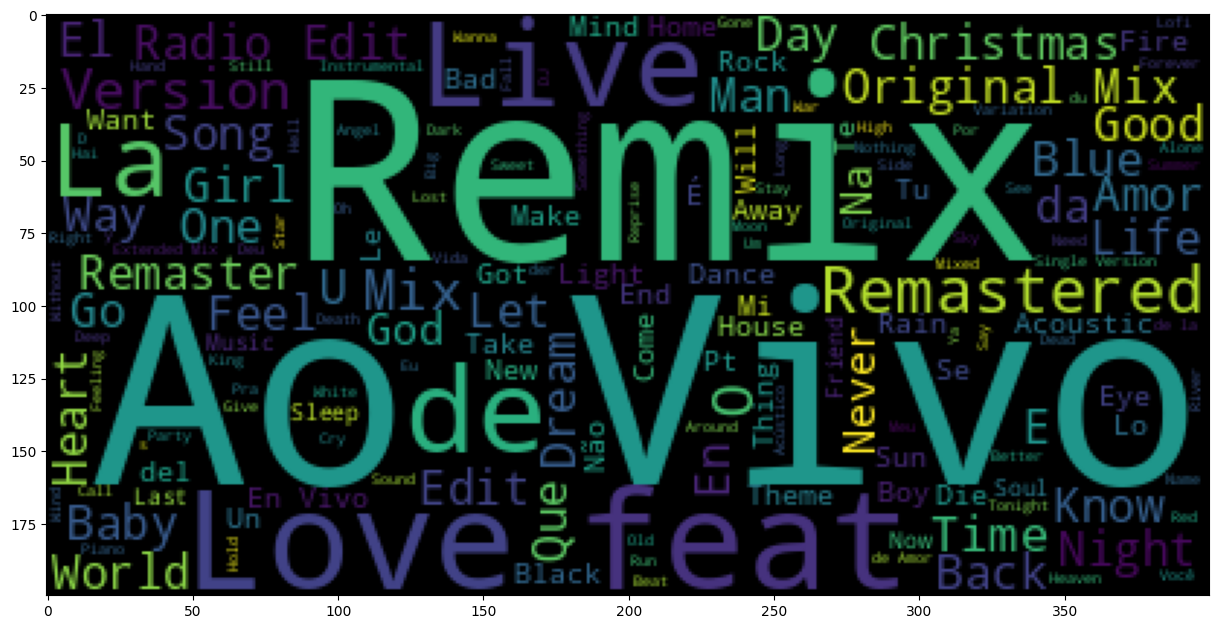

In [31]:
text = ' '.join(df['track_name'])
plt.figure(figsize=(15, 12))
wordcloud = WordCloud(background_color = 'black').generate(text)
plt.imshow(wordcloud)

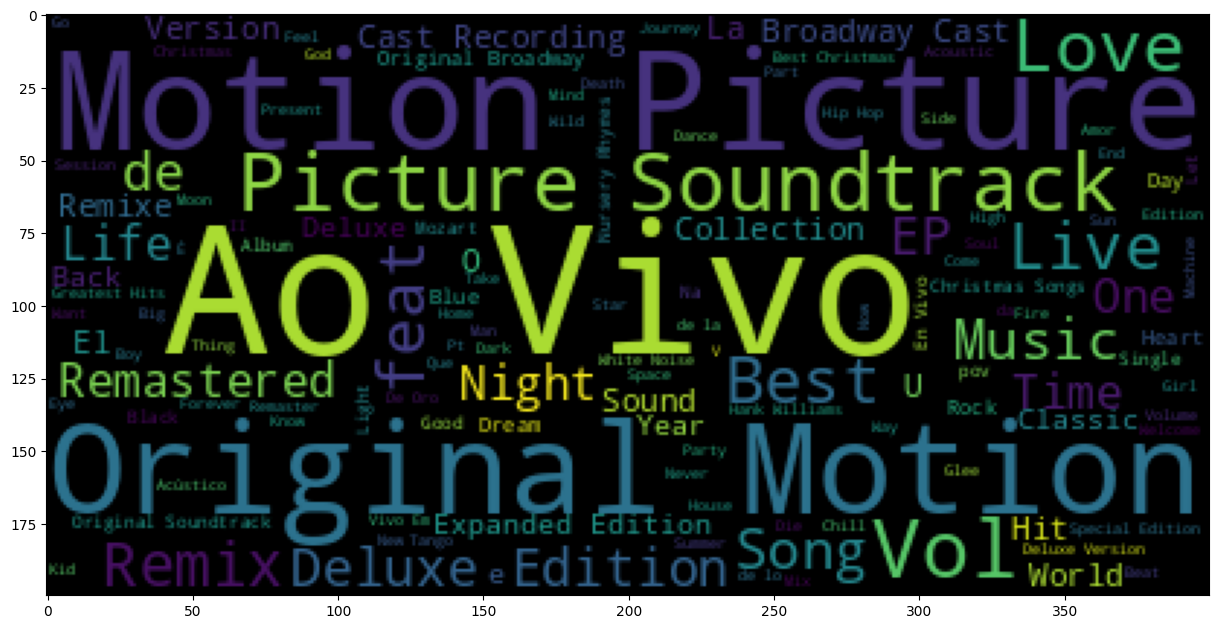

In [32]:
text = ' '.join(df['album_name'])
plt.figure(figsize=(15, 12))
wordcloud = WordCloud(background_color = 'black').generate(text)
plt.imshow(wordcloud)

#### Fitur Numerik

In [33]:
df_numerik = df.select_dtypes(include=['float64', 'int64'])

In [34]:
df_numerik

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
68827,43,193850,0.716,0.654,7,-8.625,1,0.1420,0.488000,0.000000,0.1140,0.407,161.038,4
113008,64,229760,0.597,0.417,2,-7.952,1,0.0502,0.395000,0.000008,0.1280,0.263,143.839,4
8407,54,192600,0.550,0.883,2,-5.964,1,0.0937,0.007150,0.000000,0.0924,0.417,150.004,3
108756,18,141949,0.712,0.261,3,-12.246,1,0.0952,0.976000,0.000000,0.0924,0.847,128.489,4
41100,50,226000,0.579,0.266,5,-18.156,0,0.0358,0.954000,0.807000,0.1100,0.324,115.870,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,3,185906,0.569,0.963,7,-3.069,1,0.0593,0.000787,0.025600,0.2200,0.820,76.995,4
98562,23,219440,0.665,0.564,7,-6.145,1,0.0730,0.391000,0.000000,0.0766,0.623,108.807,4
58523,22,342586,0.304,0.975,1,-5.014,1,0.0784,0.002490,0.568000,0.0979,0.110,95.573,4
8039,0,152933,0.746,0.458,11,-8.844,1,0.0312,0.063100,0.000000,0.1670,0.942,100.429,4


Penulis mengelompokan data popularity ke dalam rentang diskrit yang masing-masing terdiri dari lima poin. Jenis transformasi data ini dapat berguna untuk berbagai tujuan seperti visualisasi, analisis, atau membuat fitur kategorikal untuk model pembelajaran mesin. Transformasi ini dapat membantu menyederhanakan data dan membuatnya lebih mudah digunakan saat berurusan dengan rentang nilai.

<Axes: >

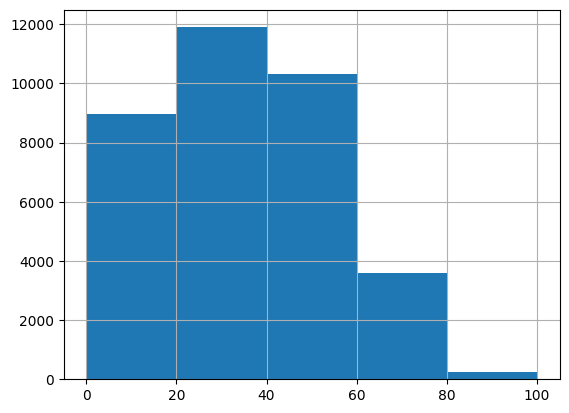

In [35]:
df_numerik['popularity'].hist(bins = 5)

In [36]:
df_numerik['popularity'].head()

68827     43
113008    64
8407      54
108756    18
41100     50
Name: popularity, dtype: int64

In [37]:
df_numerik.popularity.isna().sum()

0

In [38]:
def popularity_category(popularity):
  if (popularity >= 0 and popularity <21):
    popularity = 'pop1'
  elif (popularity>= 21 and popularity <41):
    popularity = 'pop2'
  elif (popularity>= 41 and popularity < 61):
    popularity = 'pop3'
  elif (popularity>= 61 and popularity < 81):
    popularity = 'pop4'
  elif (popularity>= 81 and popularity <= 100):
    popularity = 'pop5'
  return popularity

df_numerik['popularity'] = df_numerik['popularity'].apply(popularity_category)

<Axes: >

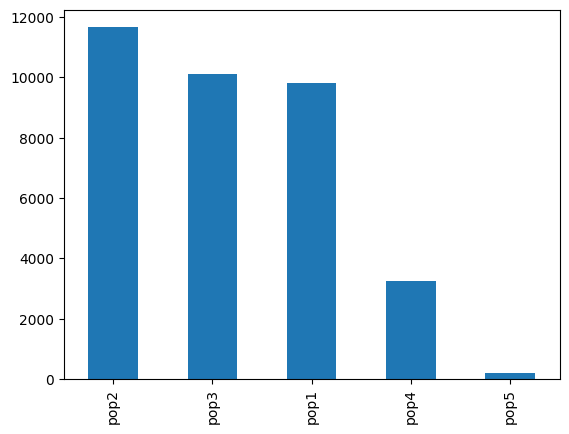

In [39]:
df_numerik['popularity'].value_counts().plot(kind= 'bar')

lakukan yang sama pada fitur tempo

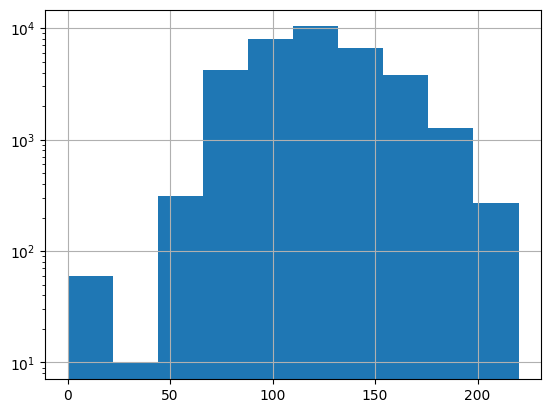

In [40]:
df_numerik['tempo'].hist()
plt.yscale("log")

In [41]:
def tempo_category(tempo):
  if (tempo >= 0 and tempo <44):
    tempo = 'tempo1'
  elif (tempo>= 44 and tempo <88):
    tempo = 'tempo2'
  elif (tempo>= 88 and tempo < 132):
    tempo = 'tempo3'
  elif (tempo>= 132 and tempo < 176):
    tempo = 'tempo4'
  elif (tempo>= 176 and tempo <= 221):
    tempo = 'tempo5'
  return tempo
df_numerik['tempo'] = df_numerik['tempo'].apply(tempo_category)

<Axes: >

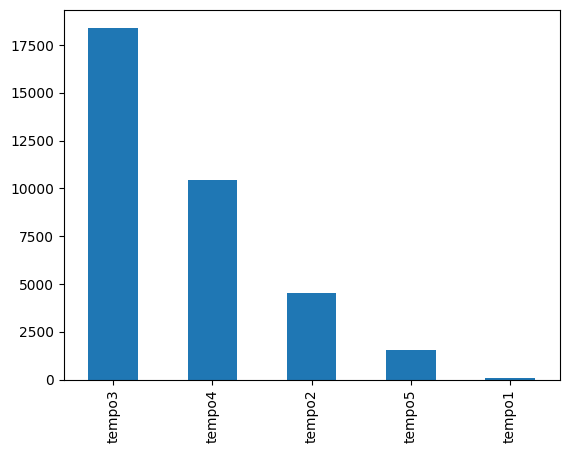

In [42]:
df_numerik['tempo'].value_counts().plot(kind = 'bar')

membuat duration dari tracks menjadi satuan menit.

In [43]:
df_numerik['duration_ms'] = df_numerik['duration_ms'].apply(lambda x : round((x/60000), 2))

In [44]:
df_numerik['duration_ms']

68827     3.23
113008    3.83
8407      3.21
108756    2.37
41100     3.77
          ... 
2023      3.10
98562     3.66
58523     5.71
8039      2.55
737       4.91
Name: duration_ms, Length: 35000, dtype: float64

In [45]:
df_numerik['duration_ms'].describe().round(2)

count    35000.00
mean         3.83
std          2.02
min          0.29
25%          2.89
50%          3.56
75%          4.42
max         79.82
Name: duration_ms, dtype: float64

In [46]:
df_numerik

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
68827,pop3,3.23,0.716,0.654,7,-8.625,1,0.1420,0.488000,0.000000,0.1140,0.407,tempo4,4
113008,pop4,3.83,0.597,0.417,2,-7.952,1,0.0502,0.395000,0.000008,0.1280,0.263,tempo4,4
8407,pop3,3.21,0.550,0.883,2,-5.964,1,0.0937,0.007150,0.000000,0.0924,0.417,tempo4,3
108756,pop1,2.37,0.712,0.261,3,-12.246,1,0.0952,0.976000,0.000000,0.0924,0.847,tempo3,4
41100,pop3,3.77,0.579,0.266,5,-18.156,0,0.0358,0.954000,0.807000,0.1100,0.324,tempo3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,pop1,3.10,0.569,0.963,7,-3.069,1,0.0593,0.000787,0.025600,0.2200,0.820,tempo2,4
98562,pop2,3.66,0.665,0.564,7,-6.145,1,0.0730,0.391000,0.000000,0.0766,0.623,tempo3,4
58523,pop2,5.71,0.304,0.975,1,-5.014,1,0.0784,0.002490,0.568000,0.0979,0.110,tempo3,4
8039,pop1,2.55,0.746,0.458,11,-8.844,1,0.0312,0.063100,0.000000,0.1670,0.942,tempo3,4


In [47]:
df_numerik.columns

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [48]:
df.loc[(df['loudness'].isin(list(range(-15, 0)))),[ 'track_genre', 'track_name', 'artists']]

,track_genre,track_name,artists
5410,"anime,j-pop",Flamingo,Kenshi Yonezu
47792,"hard-rock,hardcore",Sonho Médio,Dead Fish
93490,romance,Ехал на ярмарку ухарь-купец,Nikolai Erdenko
6103,"black-metal,death-metal",The Iron Gate,I AM
79344,piano,"Allentown - Live at Yankee Stadium, Bronx, NY ...",Billy Joel
27381,drum-and-bass,Weed & Rum - Big Yard Version,Chase & Status;Masicka
48471,hardcore,Cose più grandi di te,Le Endrigo
34470,folk,Innocence and Sadness,Dermot Kennedy
93993,romance,Ехал на ярмарку ухарь-купец,Nikolai Erdenko
13685,chicago-house,Ready 2 Wear - Dallas Austin Modernaire Mix,Felix Da Housecat;Dallas Austin;Chris Trucher


array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'loudness'}>, <Axes: >]], dtype=object)

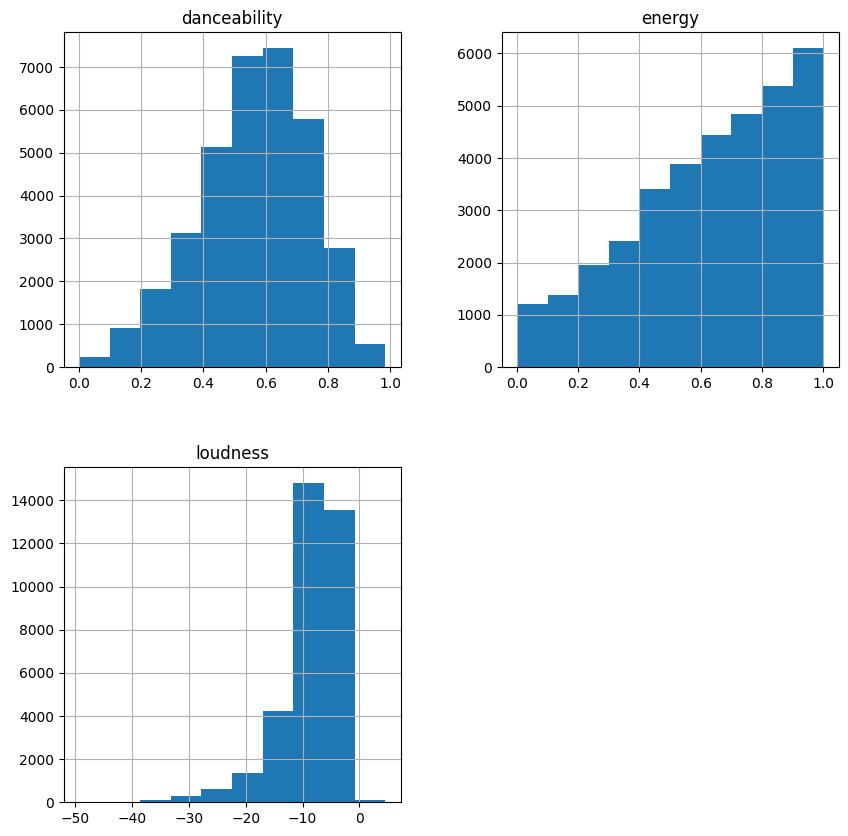

In [49]:
df_numerik[['danceability', 'energy','loudness']].hist(figsize=(10,10))

array([[<Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>],
       [<Axes: title={'center': 'instrumentalness'}>, <Axes: >]],
      dtype=object)

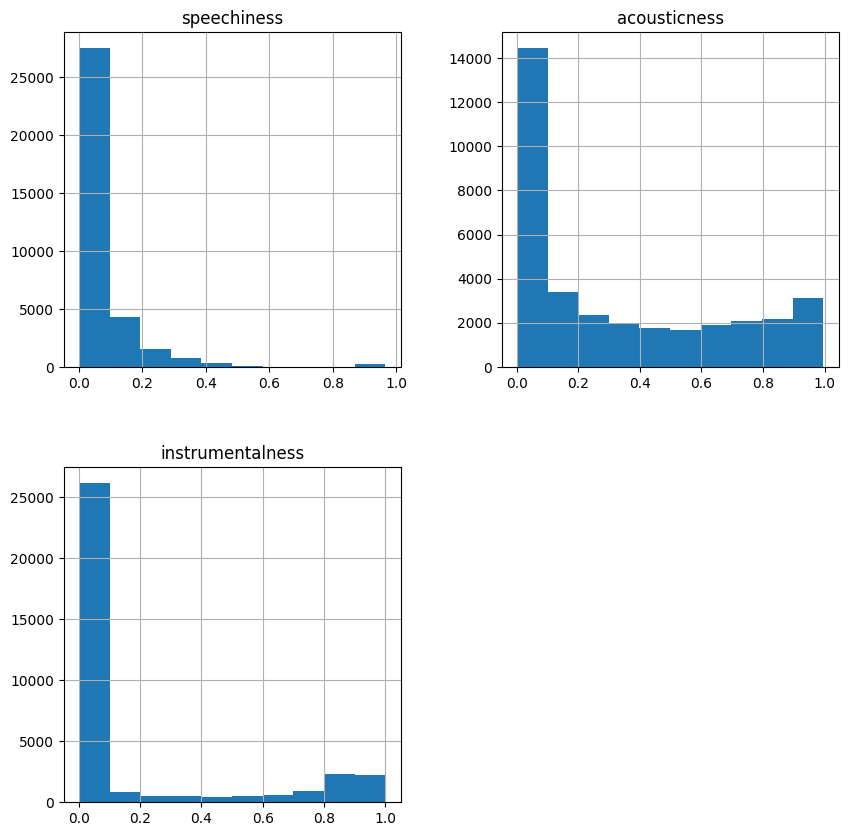

In [50]:
df_numerik[['speechiness', 'acousticness', 'instrumentalness',]].hist(figsize=(10,10))

array([[<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>]], dtype=object)

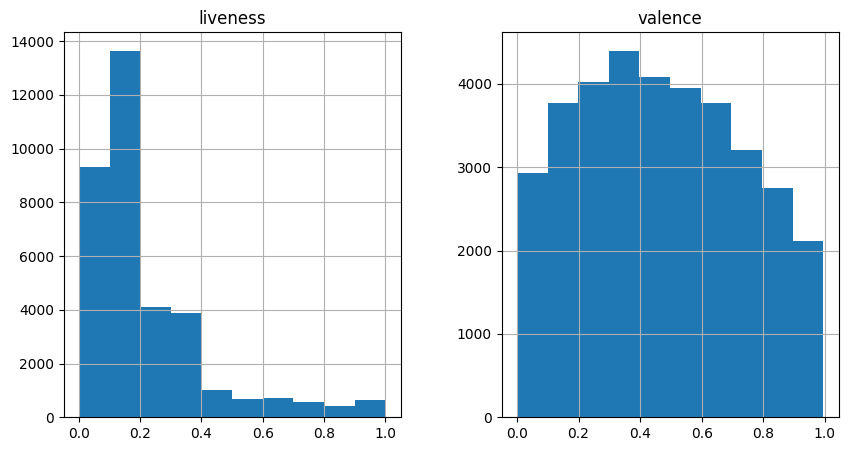

In [51]:
df_numerik[['liveness', 'valence']].hist(figsize=(10,5))

array([[<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'mode'}>],
       [<Axes: title={'center': 'time_signature'}>, <Axes: >]],
      dtype=object)

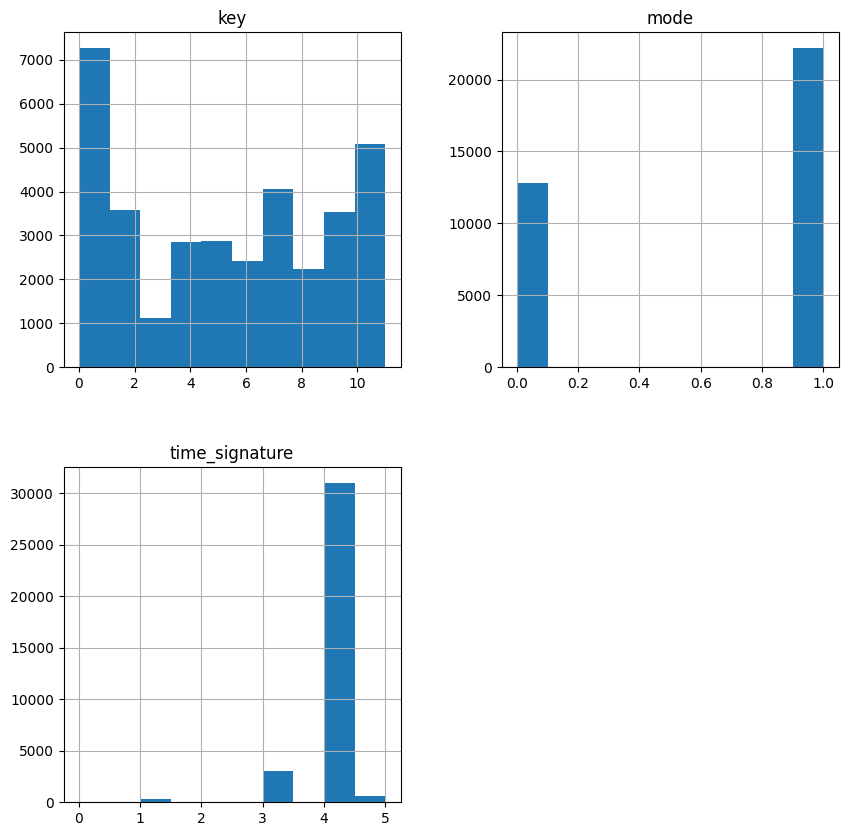

In [52]:
df_numerik[['key','mode', 'time_signature']].hist(figsize=(10,10))

## Data Preparation

### Feature engineering

Scaling fitur numerik menggunakan min-max scaler

In [53]:
def scaling(df_numerik):
    numerik = df_numerik.reset_index(drop = True)
    scaler = MinMaxScaler()
    numerik_scaled = pd.DataFrame(scaler.fit_transform(numerik), columns = numerik.columns)
    return numerik_scaled

In [54]:
def one_hot_encoding(df, fitur):
  ohe = pd.get_dummies(df[fitur])
  ohe.reset_index(drop = True, inplace = True)
  return ohe

In [55]:
def create_feature(df_numerik, df_categorical):
  tfidf = TfidfVectorizer(tokenizer=lambda x: x.split(','))
  tfidf_matrix =  tfidf.fit_transform(df_categorical['track_genre'])
  df_genre = pd.DataFrame(tfidf_matrix.toarray())
  df_genre.columns = [f"genre | {i}" for i in tfidf.get_feature_names_out()]
  df_genre.reset_index(drop = True, inplace=True)

  ohe_popularity = one_hot_encoding(df_numerik, 'popularity')
  ohe_tempo = one_hot_encoding(df_numerik, 'tempo')

  df_numerik.pop('popularity')
  df_numerik.pop('tempo')

  numerik_scaled = scaling(df_numerik)
  final_df = pd.concat([df_genre, ohe_popularity, ohe_tempo, numerik_scaled], axis = 1)

  final_df['track_name']=df_categorical['track_name'].values
  return final_df


In [56]:
final_df = create_feature(df_numerik, df_categorical)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [57]:
final_df

,genre | acoustic,genre | afrobeat,genre | alt-rock,genre | alternative,genre | ambient,genre | anime,genre | black-metal,genre | bluegrass,genre | blues,genre | brazil,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,time_signature,track_name
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.636364,0.755623,1.0,0.147150,0.489960,0.000000,0.1140,0.409045,0.8,El Juego
1,0.0,0.0,0.707779,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.181818,0.768123,1.0,0.052021,0.396586,0.000008,0.1280,0.264322,0.8,God Only Knows
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,...,0.181818,0.805048,1.0,0.097098,0.007179,0.000000,0.0924,0.419095,0.6,Rule the World
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.272727,0.688367,1.0,0.098653,0.979920,0.000000,0.0924,0.851256,0.8,Muñeca Brava
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.454545,0.578595,0.0,0.037098,0.957831,0.807000,0.1100,0.325628,0.8,Give Me Light
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34995,0.0,0.0,0.448850,0.446735,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.636364,0.858820,1.0,0.061451,0.000790,0.025600,0.2200,0.824121,0.8,Animals
34996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.636364,0.801687,1.0,0.075648,0.392570,0.000000,0.0766,0.626131,0.8,Big Time
34997,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.090909,0.822694,1.0,0.081244,0.002500,0.568000,0.0979,0.110553,0.8,Wrath
34998,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.706788,0.0,...,1.000000,0.751556,1.0,0.032332,0.063353,0.000000,0.1670,0.946734,0.8,"Merry Christmas, Baby [take 1] - Take 1"


## Modelling

In [59]:
custom_df = final_df.drop('track_name', axis = 1)

In [60]:
cosine_sim = cosine_similarity(custom_df, custom_df)

In [61]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=final_df['track_name'], columns=final_df['track_name'])

cosine_sim_df.sample(10, axis=1).sample(10, axis=0)

track_name,Solaris - Undercatt Remix,Practice What You Preach,Muthe Muthe - Duet Version,Goldmarie,Grandpa (Tell Me ‘Bout The Good Old Days),Oxygen,Não Tente Me Impedir - Ao Vivo,Tender Years,Growl,Breaking Me
track_name,,,,,,,,,,
You Are My King (Amazing Love) - Live,0.765721,0.597174,0.811439,0.498420,0.784153,0.548068,0.388527,0.430979,0.759177,0.541084
Jungle Fire,0.644700,0.728694,0.531686,0.572625,0.532064,0.635710,0.502527,0.453954,0.590335,0.643313
Country Outta My Girl,0.512924,0.635077,0.523478,0.708829,0.486612,0.479479,0.487787,0.583955,0.480921,0.481180
Sexy Movimiento,0.569491,0.654778,0.588603,0.620571,0.581375,0.679806,0.563569,0.513921,0.512948,0.733359
我不難過,0.619258,0.599576,0.654621,0.501363,0.635622,0.703301,0.547095,0.454107,0.614049,0.543477
Problemón,0.542160,0.519892,0.565302,0.418570,0.530133,0.605992,0.457820,0.338020,0.537335,0.804735
Found God in a Tomato,0.449692,0.472826,0.467991,0.489638,0.413485,0.516935,0.513455,0.571957,0.466162,0.361722
Chainsaw Gutsfuck,0.603243,0.623948,0.480931,0.378591,0.435182,0.712421,0.554645,0.253644,0.603026,0.558055
Our Song,0.427383,0.364646,0.407578,0.474196,0.405695,0.535921,0.545138,0.477581,0.357086,0.758213


In [62]:
data_rekomendasi = df.copy()

In [63]:
def get_recommendations(track_name, n = 5):
  indices = pd.Series(final_df.index, index=final_df['track_name']).drop_duplicates()
  try:
    idx = indices[track_name]
  except KeyError:
    return "Lagu tidak ditemukan"
  sim_scores = list(enumerate(cosine_sim[idx]))
  sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
  sim_scores = sim_scores[1:n+1]
  song_indices = [i[0] for i in sim_scores]
  sim_scores_list = [i[1] for i in sim_scores]
  recommended_songs = data_rekomendasi[['track_name', 'artists', 'album_name']].iloc[song_indices]

  recommended_songs['similiarity_score'] = sim_scores_list

  return track_name, recommended_songs




In [72]:
track_name, recommended_songs = get_recommendations("DDU-DU DDU-DU", n=10)
print(f"lagu yang pengguna dengar {track_name}")
recommended_songs

lagu yang pengguna dengar DDU-DU DDU-DU


,track_name,artists,album_name,similiarity_score
65057,Love Shot,EXO,LOVE SHOT– The 5th Album Repackage,0.993455
65451,Black Swan,BTS,Black Swan,0.992694
65456,VILLAIN,K/DA;Madison Beer;Kim Petras;League of Legends,ALL OUT,0.991990
65101,HOME,BTS,MAP OF THE SOUL : PERSONA,0.991158
65705,LA DI DA,EVERGLOW,-77.82x-78.29,0.988543
65682,I NEED U,BTS,Proof,0.986266
65827,Likey,TWICE,Twicetagram,0.985638
65566,Lonely Boy (The tattoo on my ring finger),TOMORROW X TOGETHER,minisode 2: Thursday's Child,0.985497
65460,Anymore,JEON SOMI,XOXO,0.985066
65654,The Eve,EXO,THE WAR - The 4th Album,0.984930


In [78]:
def relevant(cos_sim):
  num_relevant = 0
  for cs in cos_sim:
    if cs > 0.95:
      num_relevant +=1
  return num_relevant

In [79]:
def precision(num_relevant, num_recommend_song):
  precision = num_relevant/ num_recommend_song
  return precision


In [82]:
recommendations = get_recommendations("DDU-DU DDU-DU", n=10)
cosine_similarity_values = recommended_songs['similiarity_score']
number_recommended_song = recommended_songs.shape[0]

In [83]:
num_relevant= relevant(cosine_similarity_values)
precision = precision(num_relevant, number_recommended_song)
print(f"Jumlah lagu yang direkomendasikan: {number_recommended_song}")
print(f"Jumlah rekomendasi relevan: {num_relevant}")
print(f"precision: {precision}")

Jumlah lagu yang direkomendasikan: 10
Jumlah rekomendasi relevan: 10
precision: 1.0
